In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



In [8]:
# Dataset Loading
restaurant_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews_df = pd.read_csv("Zomato Restaurant reviews.csv")



In [9]:
# Dataset First View
print("Restaurant Dataset Head:")
print(restaurant_df.head())
print("\nReviews Dataset Head:")
print(reviews_df.head())



Restaurant Dataset Head:
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                    

In [10]:
# Dataset Rows & Columns count
print("\nShape of Restaurant Dataset:", restaurant_df.shape)
print("Shape of Reviews Dataset:", reviews_df.shape)




Shape of Restaurant Dataset: (105, 6)
Shape of Reviews Dataset: (10000, 7)


In [11]:
# Dataset Information
print("\nRestaurant Dataset Info:")
print(restaurant_df.info())
print("\nReviews Dataset Info:")
print(reviews_df.info())




Restaurant Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
None

Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes:

In [12]:
# Duplicate Values
print("\nDuplicate rows in restaurant_df:", restaurant_df.duplicated().sum())
print("Duplicate rows in reviews_df:", reviews_df.duplicated().sum())




Duplicate rows in restaurant_df: 0
Duplicate rows in reviews_df: 36


In [13]:
# Missing Values/Null Values
print("\nMissing values in Restaurant Dataset:")
print(restaurant_df.isnull().sum())

print("\nMissing values in Reviews Dataset:")
print(reviews_df.isnull().sum())




Missing values in Restaurant Dataset:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Missing values in Reviews Dataset:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


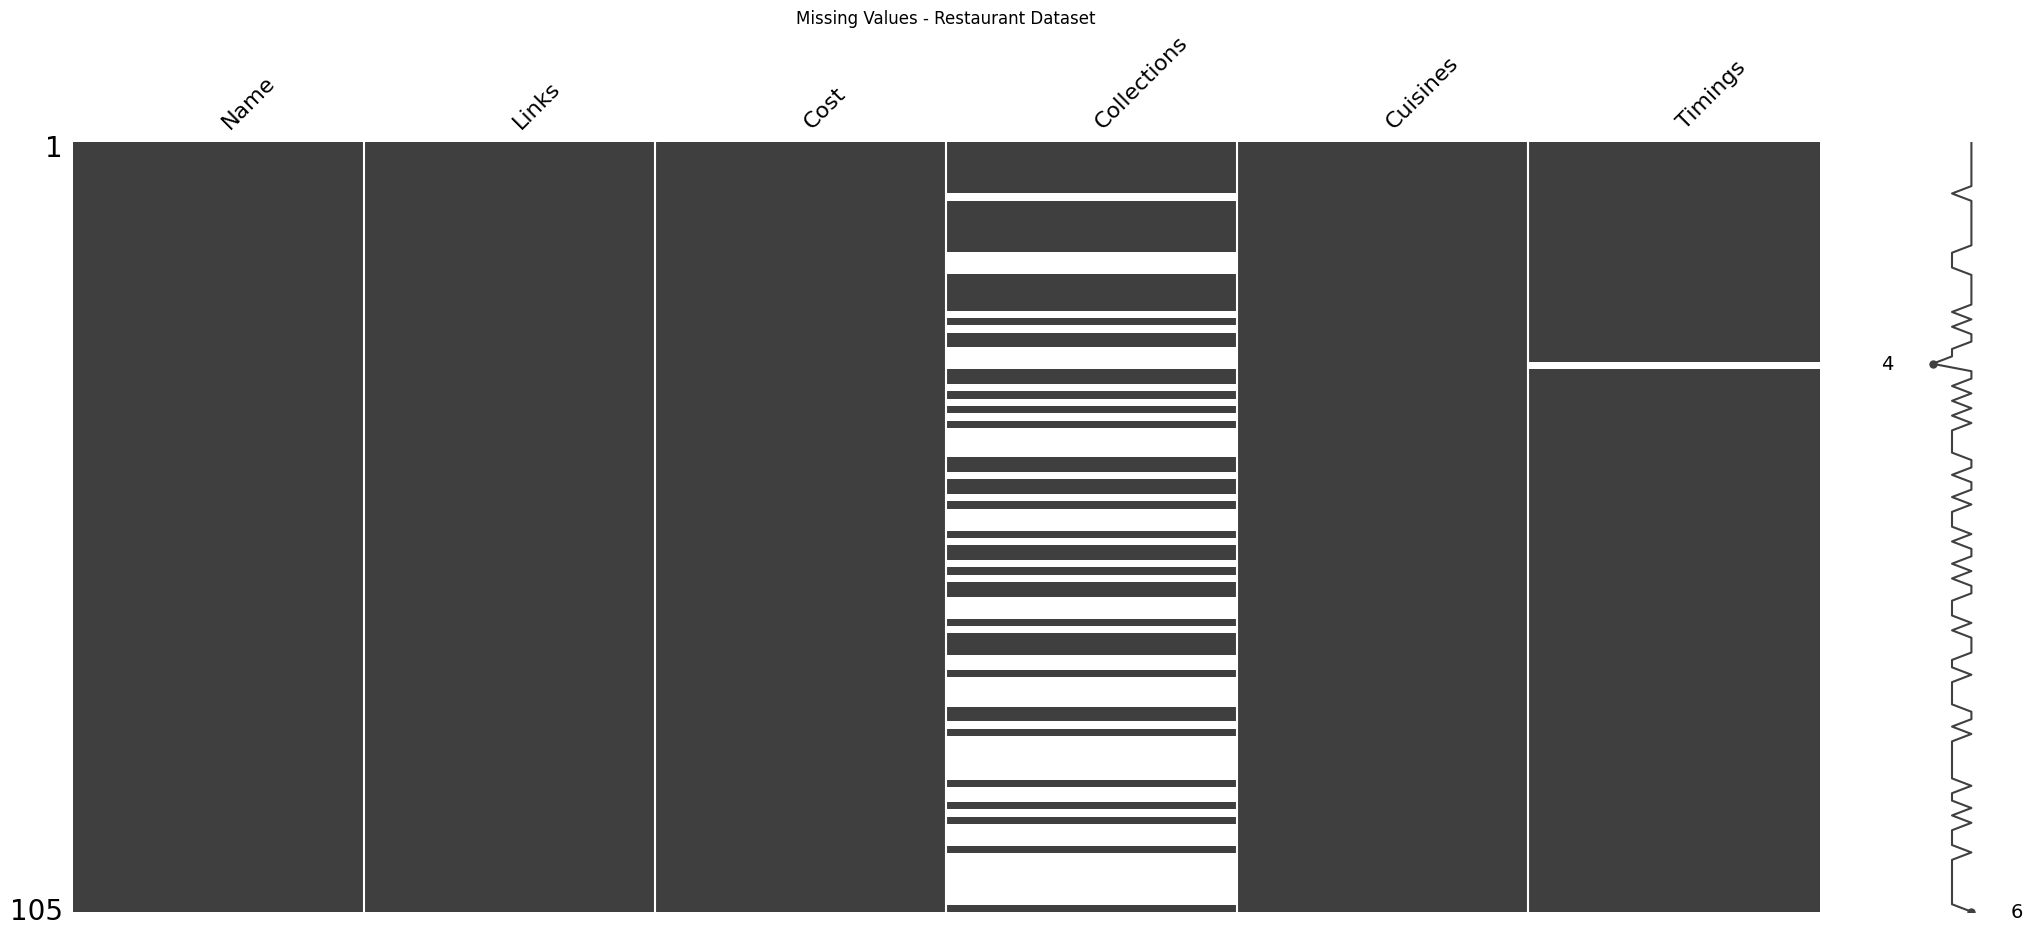

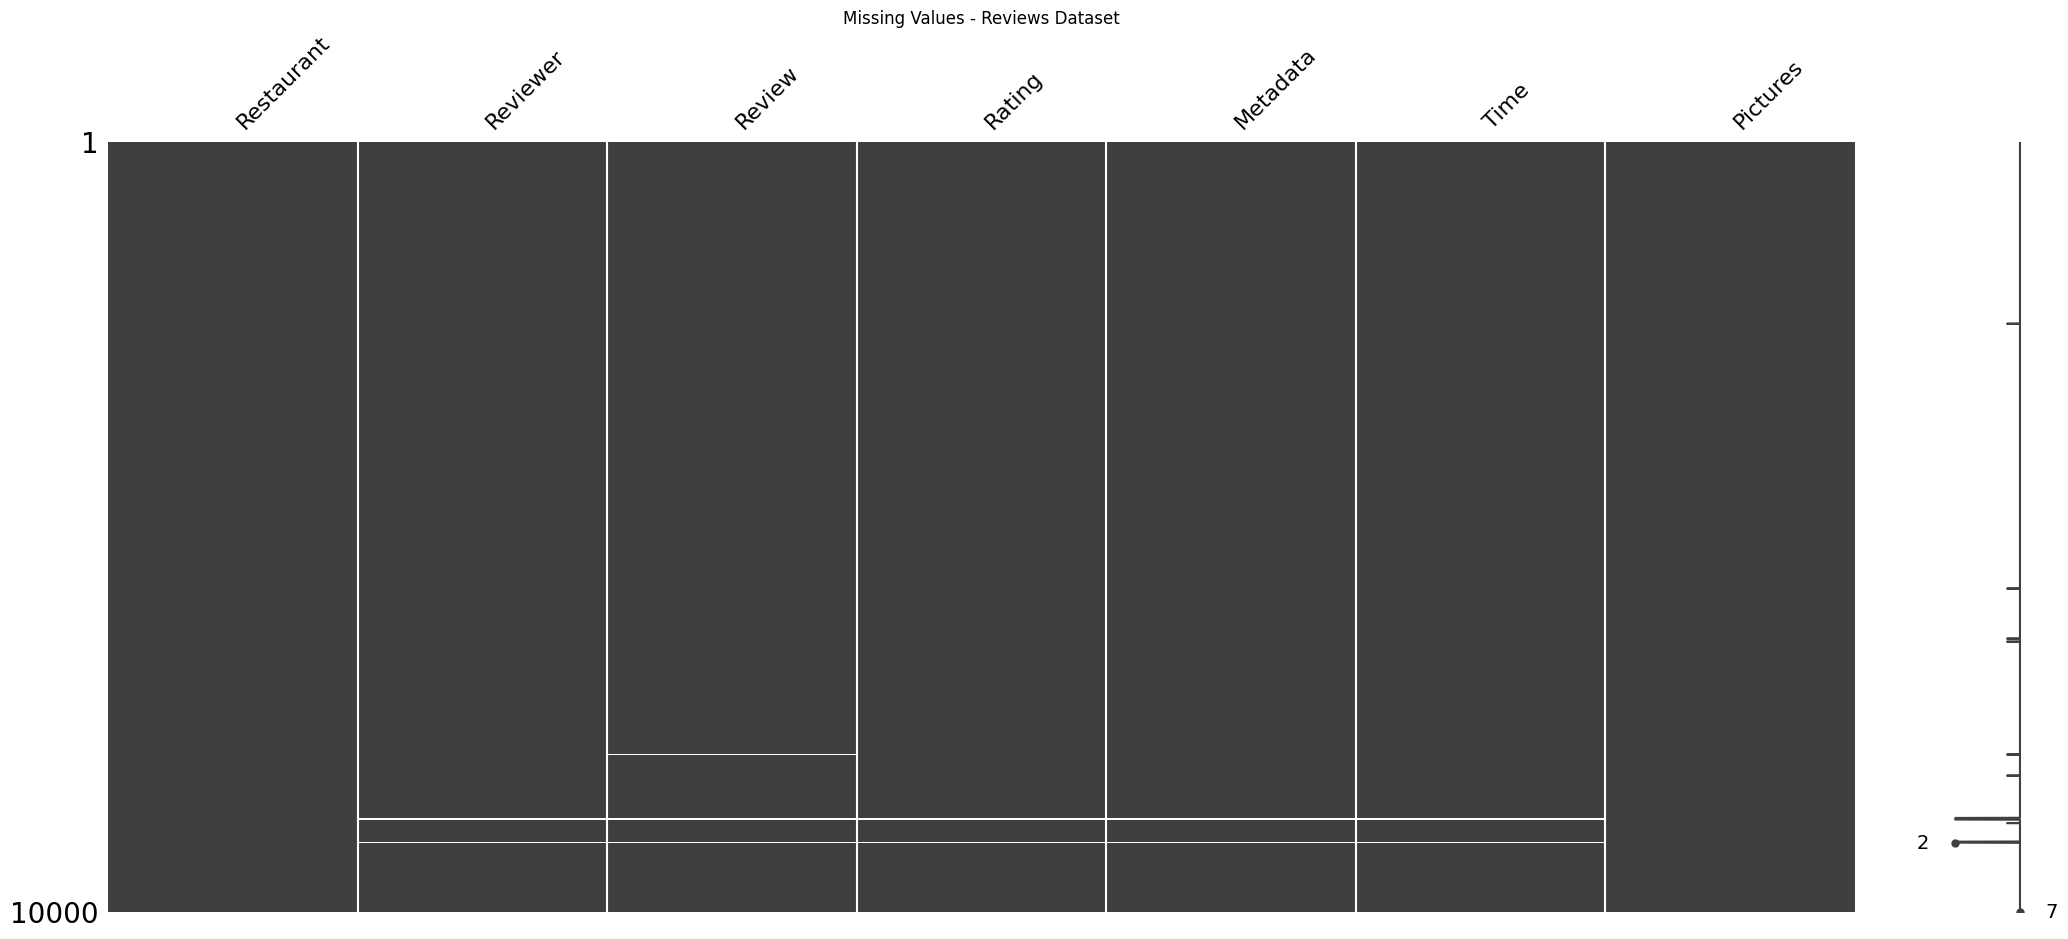

In [14]:
# Visualizing the missing values
msno.matrix(restaurant_df)
plt.title("Missing Values - Restaurant Dataset")
plt.show()

msno.matrix(reviews_df)
plt.title("Missing Values - Reviews Dataset")
plt.show()

# 2. Understanding Your Variables



In [15]:


# Dataset Columns
print("\nRestaurant Dataset Columns:", restaurant_df.columns.tolist())
print("\nReviews Dataset Columns:", reviews_df.columns.tolist())

# Dataset Describe
print("\nRestaurant Dataset Summary:")
print(restaurant_df.describe(include='all'))

print("\nReviews Dataset Summary:")
print(reviews_df.describe(include='all'))


Restaurant Dataset Columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Reviews Dataset Columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

Restaurant Dataset Summary:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105    

In [16]:
# Check Unique Values for each variable
print("\nUnique value count in Restaurant Dataset:")
for col in restaurant_df.columns:
    print(f"{col}: {restaurant_df[col].nunique()}")

print("\nUnique value count in Reviews Dataset:")
for col in reviews_df.columns:
    print(f"{col}: {reviews_df[col].nunique()}")


Unique value count in Restaurant Dataset:
Name: 105
Links: 105
Cost: 29
Collections: 42
Cuisines: 92
Timings: 77

Unique value count in Reviews Dataset:
Restaurant: 100
Reviewer: 7446
Review: 9364
Rating: 10
Metadata: 2477
Time: 9782
Pictures: 36


# 3. Data Wrangling

In [17]:
# Remove Duplicates
restaurant_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)

In [18]:
# Fill missing values
restaurant_df.fillna("Unknown", inplace=True)
reviews_df['Review'] = reviews_df['Review'].fillna("")


In [19]:
if 'Restaurant_ID' in restaurant_df.columns and 'Restaurant_ID' in reviews_df.columns:
    merged_df = pd.merge(restaurant_df, reviews_df, on='Restaurant_ID', how='left')
elif 'Restaurant_Name' in restaurant_df.columns and 'Restaurant_Name' in reviews_df.columns:
    merged_df = pd.merge(restaurant_df, reviews_df, on='Restaurant_Name', how='left')
else:
    merged_df = restaurant_df.copy()

# Final cleanup (drop unnecessary columns if any, like IDs or irrelevant columns)
print("\nFinal Merged Dataset Shape:", merged_df.shape)


Final Merged Dataset Shape: (105, 6)


# 4. Data Visualization and Analysis

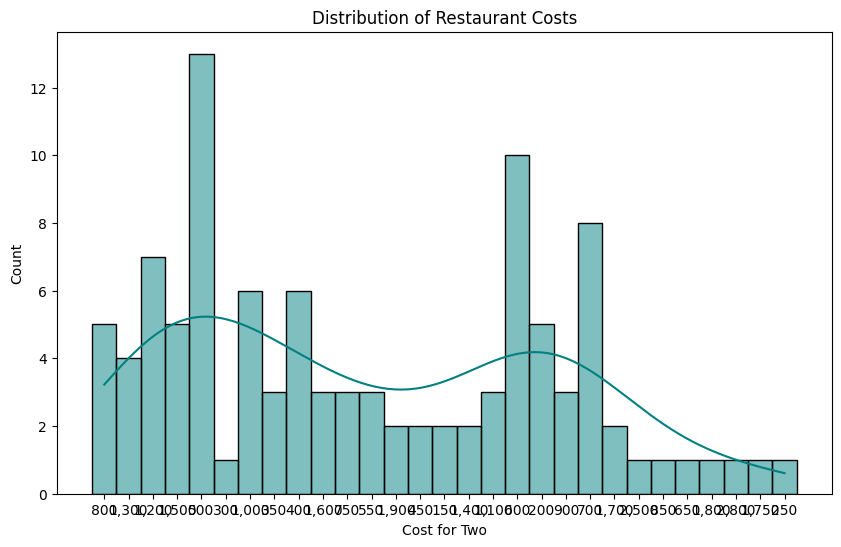

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(restaurant_df['Cost'], bins=15, kde=True, color='teal')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two')
plt.ylabel('Count')
plt.show()


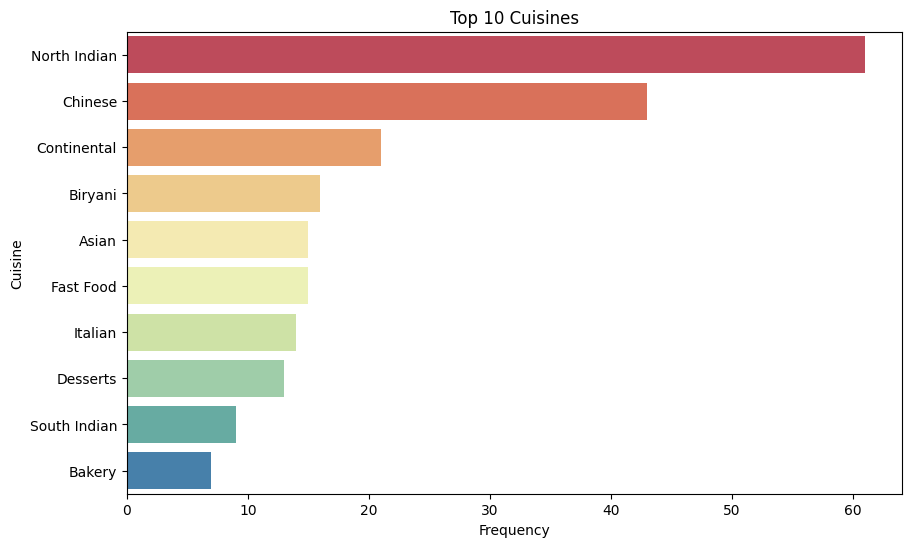

In [21]:
from collections import Counter

# Count all cuisines
cuisine_list = ','.join(restaurant_df['Cuisines'].dropna()).split(',')
cuisine_counts = pd.Series(Counter([c.strip() for c in cuisine_list]))
top_cuisines = cuisine_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Spectral')
plt.title('Top 10 Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.show()


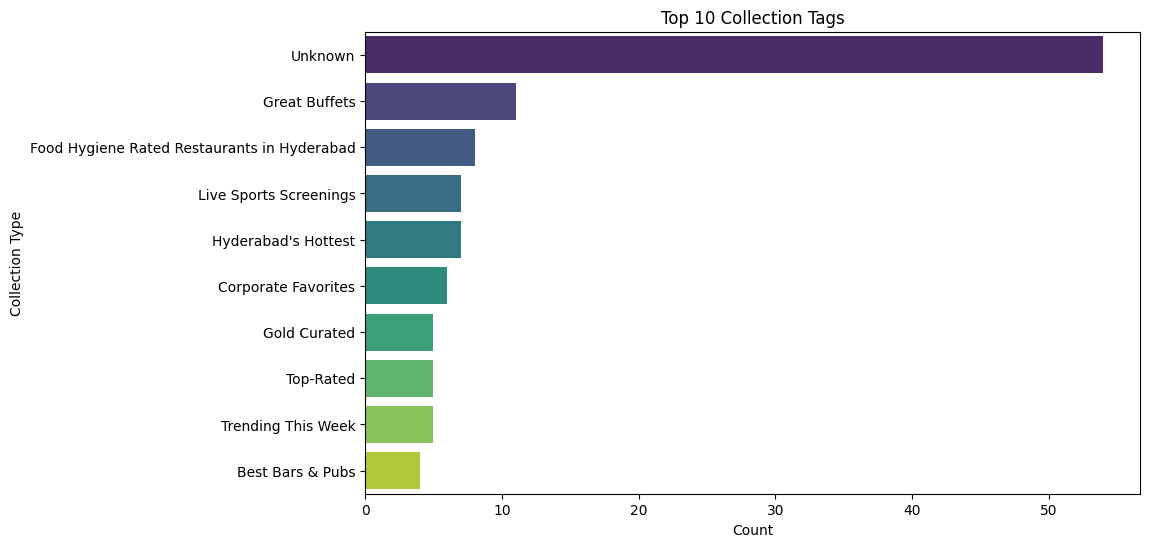

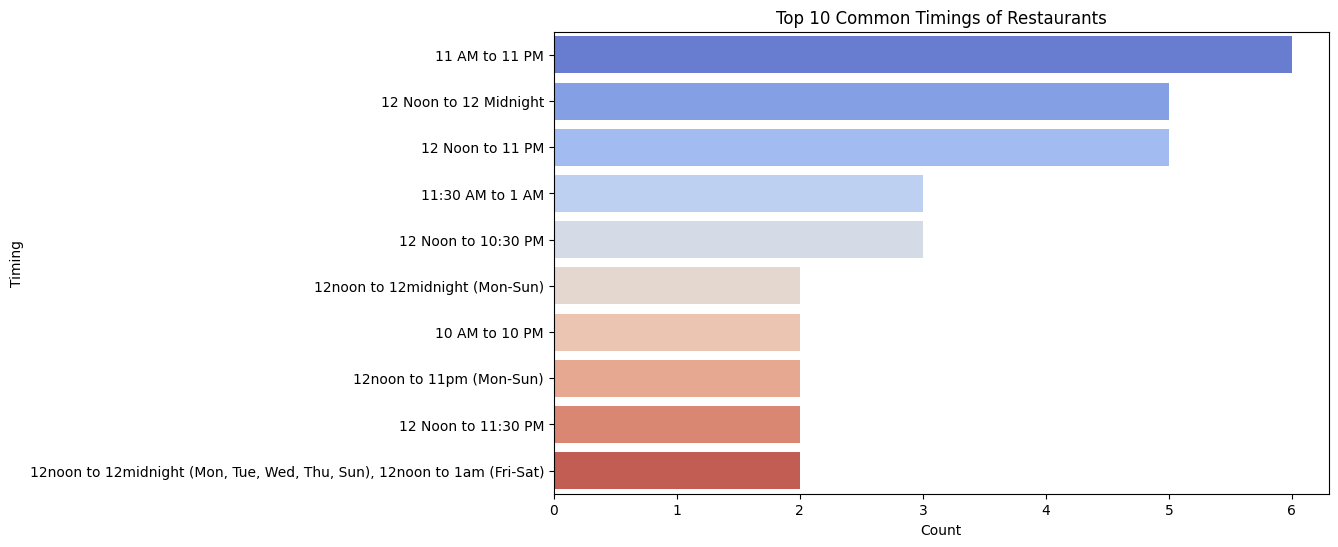

In [22]:
# chart 3 restaurant count by collection tags
collection_list = ','.join(restaurant_df['Collections'].dropna()).split(',')
collection_counts = pd.Series(Counter([c.strip() for c in collection_list]))
top_collections = collection_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_collections.values, y=top_collections.index, palette='viridis')
plt.title('Top 10 Collection Tags')
plt.xlabel('Count')
plt.ylabel('Collection Type')
plt.show()

# chart 4 no of restaurants by timing
timing_counts = restaurant_df['Timings'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=timing_counts.index, x=timing_counts.values, palette='coolwarm')
plt.title('Top 10 Common Timings of Restaurants')
plt.xlabel('Count')
plt.ylabel('Timing')
plt.show()


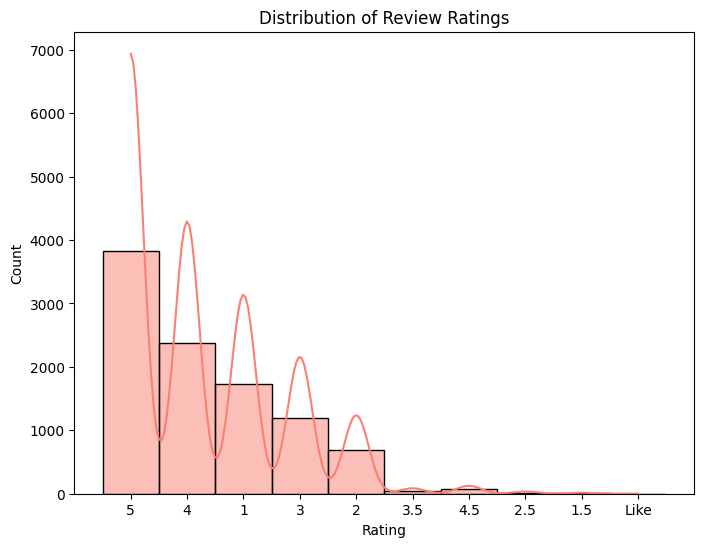

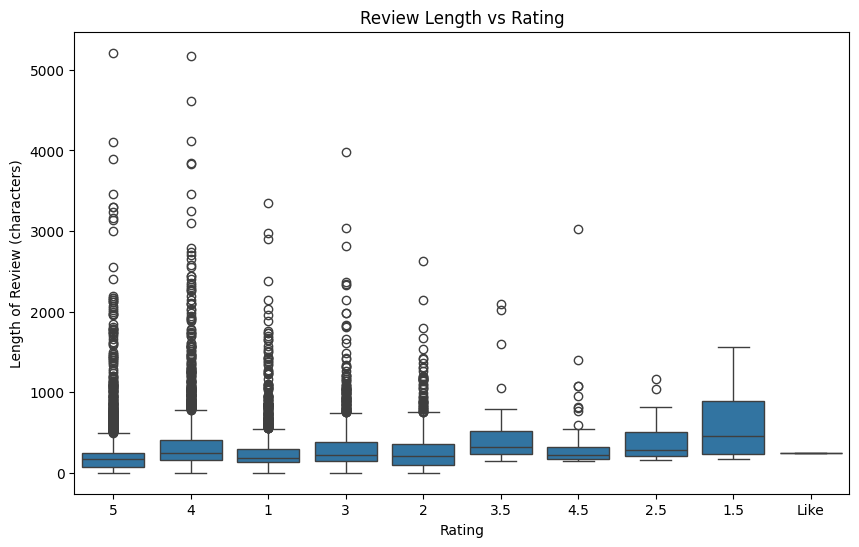

In [23]:
# chart 5 ratings distribution
plt.figure(figsize=(8,6))
sns.histplot(reviews_df['Rating'].dropna(), bins=6, kde=True, color='salmon')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# chart 6 review length vs rating
reviews_df['Review Length'] = reviews_df['Review'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Review Length', data=reviews_df)
plt.title('Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Length of Review (characters)')
plt.show()


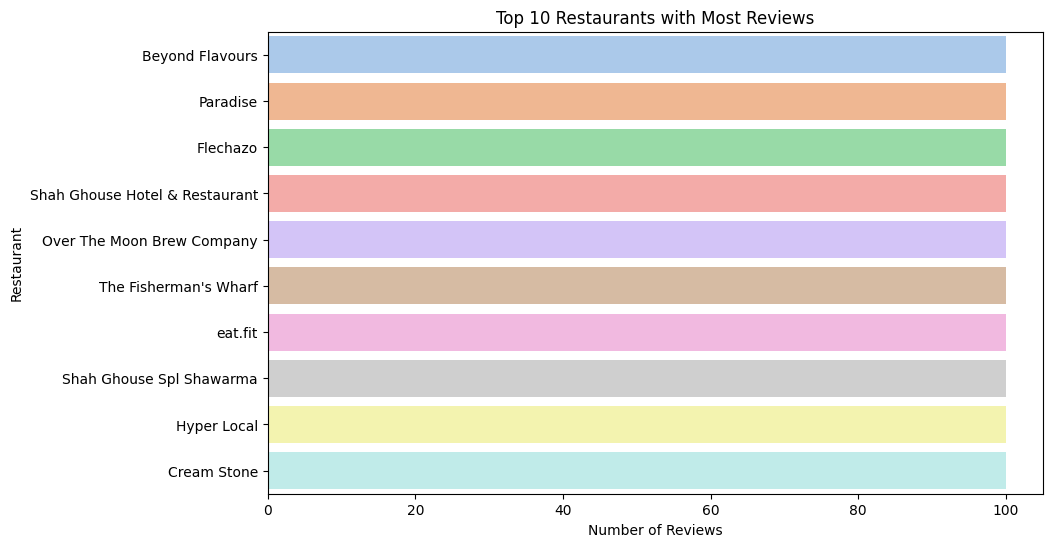

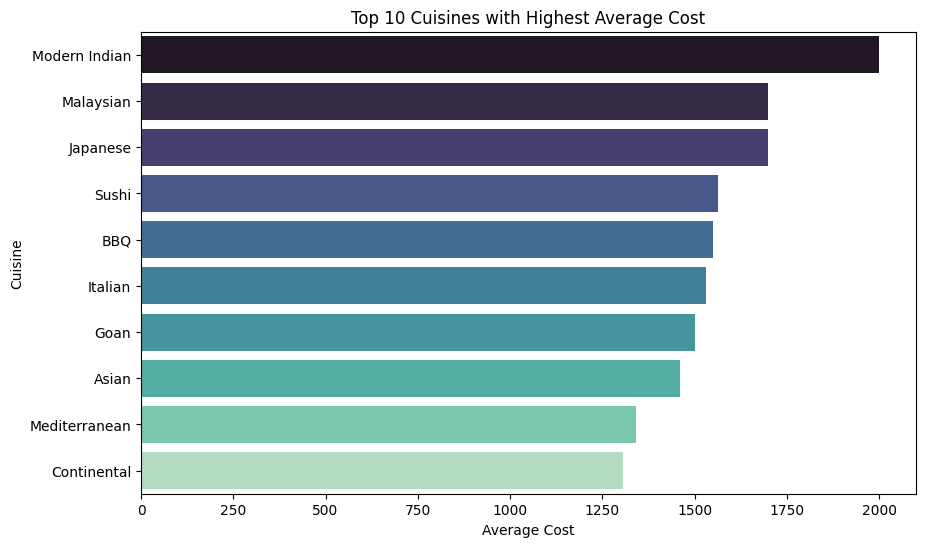

In [25]:
# 7. no of reviews per restaurant
review_counts = reviews_df['Restaurant'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=review_counts.values, y=review_counts.index, palette='pastel')
plt.title('Top 10 Restaurants with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant')
plt.show()

# 8. average cost by cuisine
# Clean 'Cost' column: remove commas and convert to integer
restaurant_df['Cost'] = restaurant_df['Cost'].str.replace(',', '').astype(float)

# Now re-merge the cleaned cost column with reviews
cuisine_expanded = restaurant_df[['Cuisines', 'Cost']].copy()
cuisine_expanded['Cuisines'] = cuisine_expanded['Cuisines'].str.split(', ')
cuisine_expanded = cuisine_expanded.explode('Cuisines')

# Group by Cuisines and calculate average cost
avg_cost_by_cuisine = cuisine_expanded.groupby('Cuisines')['Cost'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost_by_cuisine.values, y=avg_cost_by_cuisine.index, palette='mako')
plt.title('Top 10 Cuisines with Highest Average Cost')
plt.xlabel('Average Cost')
plt.ylabel('Cuisine')
plt.show()


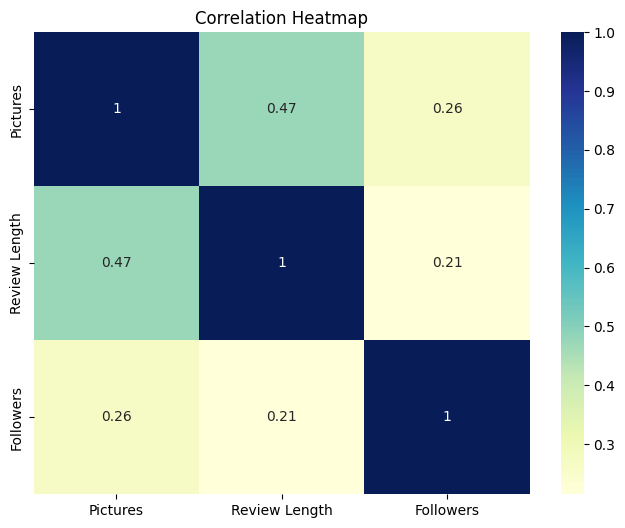

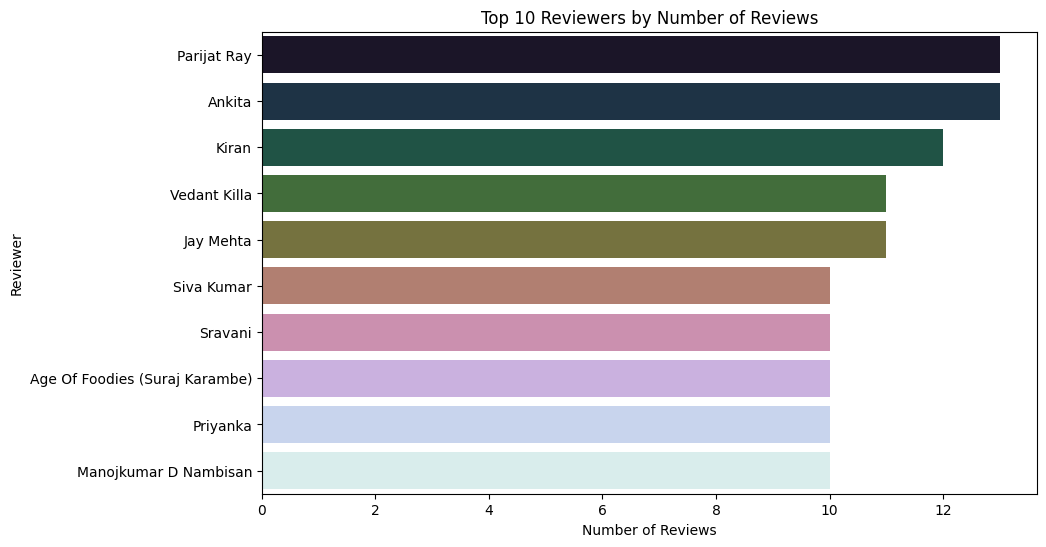

In [28]:
# 9. heatmap
reviews_df['Followers'] = reviews_df['Metadata'].str.extract(r'(\d+) Followers')[0].astype(float)

# Select only numeric columns from reviews_df (or corr_matrix)
numeric_df = reviews_df.select_dtypes(include=['number'])

# Now plot the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


#10. reviews per reviewer

top_reviewers = reviews_df['Reviewer'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='cubehelix')
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()


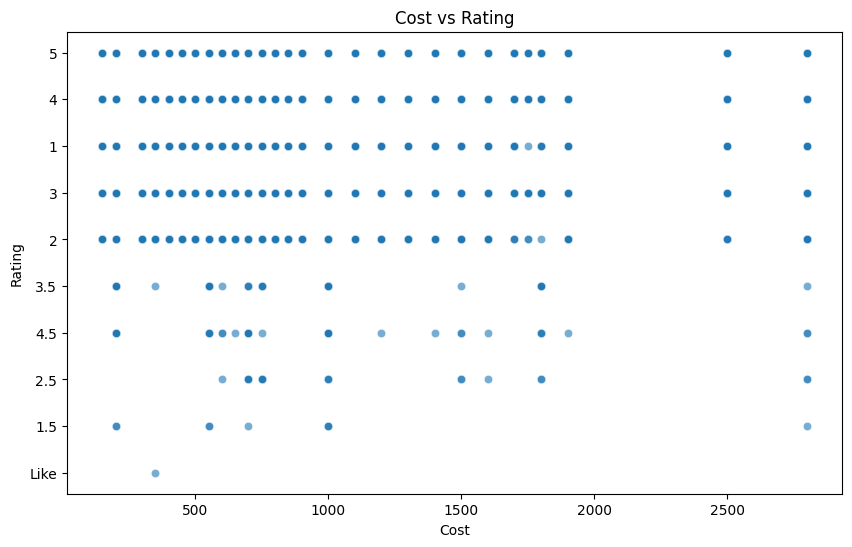

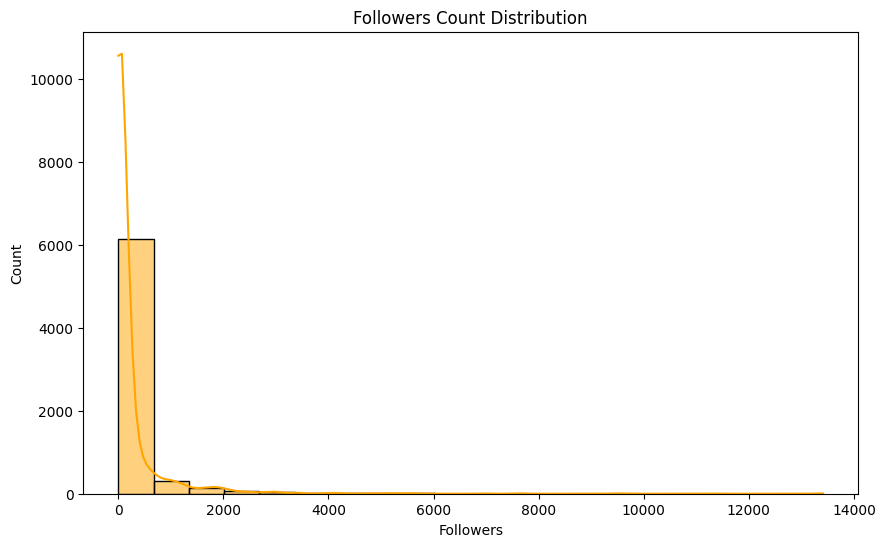

In [29]:
# 11. cost vs rating scatter
# Merge cost with ratings
merged_df = pd.merge(reviews_df, restaurant_df[['Name', 'Cost']], left_on='Restaurant', right_on='Name', how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Cost', y='Rating', data=merged_df, alpha=0.6)
plt.title('Cost vs Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

# 12. followers distribution
reviews_df['Followers'] = reviews_df['Metadata'].str.extract(r'(\d+) Followers').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Followers'].dropna(), bins=20, kde=True, color='orange')
plt.title('Followers Count Distribution')
plt.xlabel('Followers')
plt.ylabel('Count')
plt.show()


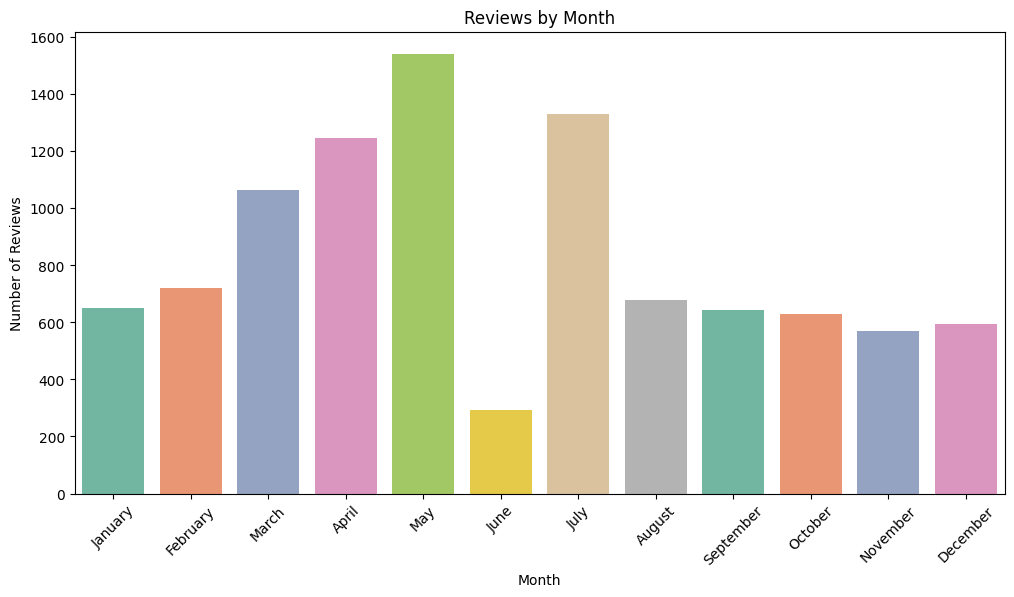

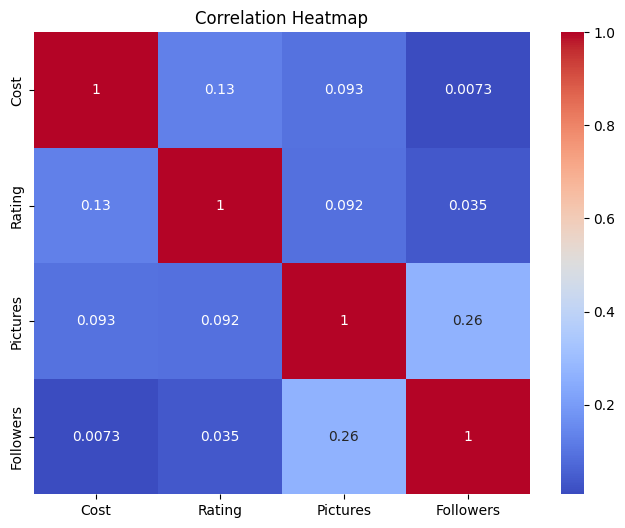

In [32]:
#13. time of review
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], errors='coerce')

reviews_df['Review Month'] = reviews_df['Time'].dt.month_name()
month_counts = reviews_df['Review Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='Set2')
plt.xticks(rotation=45)
plt.title('Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

#14. correlation heatmap of numericals
# Select relevant columns
correlation_data = merged_df[['Cost', 'Rating', 'Pictures', 'Followers']].copy()

# Clean 'Cost': remove commas and convert to float
correlation_data['Cost'] = correlation_data['Cost'].replace('[^0-9.]', '', regex=True)
correlation_data['Cost'] = pd.to_numeric(correlation_data['Cost'], errors='coerce')

# Clean 'Followers': remove non-numeric characters and convert to float
correlation_data['Followers'] = correlation_data['Followers'].replace('[^0-9.]', '', regex=True)
correlation_data['Followers'] = pd.to_numeric(correlation_data['Followers'], errors='coerce')

# Convert 'Pictures' to numeric (will convert 'Like' and others to NaN)
correlation_data['Pictures'] = pd.to_numeric(correlation_data['Pictures'], errors='coerce')

# Ensure 'Rating' is numeric
correlation_data['Rating'] = pd.to_numeric(correlation_data['Rating'], errors='coerce')

# Drop rows with any NaNs
correlation_data.dropna(inplace=True)

#  heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



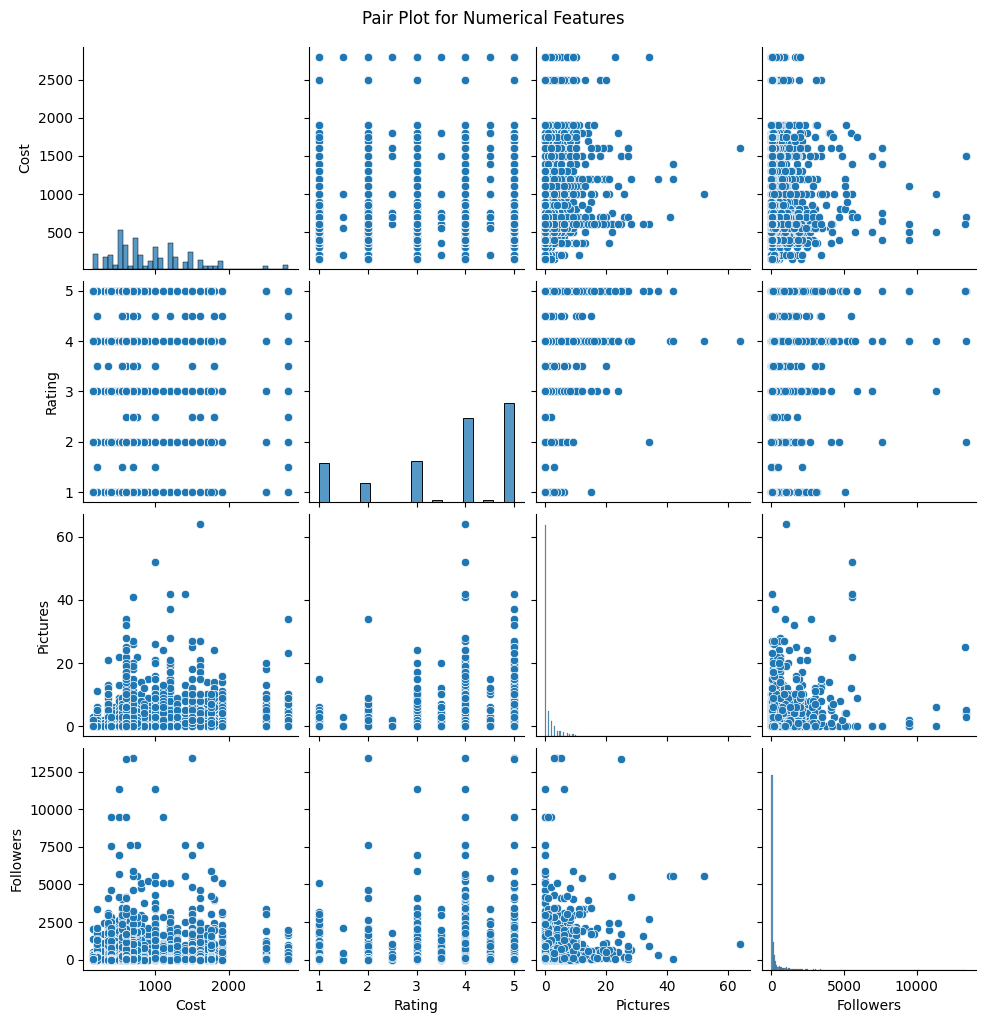

In [33]:
#15. pair plot
sns.pairplot(correlation_data)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


# 5. Hypothesis

In [35]:
#hypothesis 1 
from scipy.stats import pearsonr

# Make sure Followers is numeric
merged_df['Followers'] = pd.to_numeric(merged_df['Followers'], errors='coerce')

# Count number of reviews per user
merged_df['Review Count'] = merged_df['Reviewer'].map(merged_df['Reviewer'].value_counts())

# Drop rows with missing values in either column
df_test1 = merged_df[['Review Count', 'Followers']].dropna()

# Pearson correlation
corr1, p_val1 = pearsonr(df_test1['Review Count'], df_test1['Followers'])

print(f"Correlation coefficient: {corr1:.4f}")
print(f"P-value: {p_val1:.4f}")



Correlation coefficient: 0.1189
P-value: 0.0000


In [38]:
# hypothesis 2 : rating vs review length
from scipy.stats import pearsonr

# Calculate review length
merged_df['Review Length'] = merged_df['Review'].astype(str).str.len()

# Convert Rating to numeric
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Drop rows with missing values
df_test2 = merged_df[['Rating', 'Review Length']].dropna()

# Pearson correlation
corr2, p_val2 = pearsonr(df_test2['Rating'], df_test2['Review Length'])

print(f"Correlation coefficient: {corr2:.4f}")
print(f"P-value: {p_val2:.4f}")


Correlation coefficient: -0.0320
P-value: 0.0014


In [37]:
print(merged_df.columns.tolist())


['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Review Length', 'Followers', 'Name', 'Cost', 'Review Count']


In [39]:
# hypothesis 3: do cost differ bw north indian and south indian cuisine
from scipy.stats import ttest_ind

north_costs = cuisine_expanded[cuisine_expanded['Cuisines'] == 'North Indian']['Cost'].astype(float)
south_costs = cuisine_expanded[cuisine_expanded['Cuisines'] == 'South Indian']['Cost'].astype(float)

t_stat3, p_val3 = ttest_ind(north_costs, south_costs, equal_var=False)

print(f"T-statistic: {t_stat3:.4f}")
print(f"P-value: {p_val3:.4f}")


T-statistic: 1.0263
P-value: 0.3245


# 6. Feature Engineering and Data Preprocessing

In [40]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Restaurant          0
Reviewer            2
Review              0
Rating              3
Metadata            2
Time                2
Pictures            0
Review Length       0
Followers        3214
Name                0
Cost                0
Review Count        2
dtype: int64


In [41]:
# Drop rows with minimal missing info
merged_df.dropna(subset=['Reviewer', 'Metadata', 'Time', 'Review Count'], inplace=True)


In [42]:
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df['Rating'].fillna(merged_df['Rating'].mean(), inplace=True)


In [43]:
merged_df['Followers'] = pd.to_numeric(merged_df['Followers'], errors='coerce')
merged_df['Followers'].fillna(0, inplace=True)


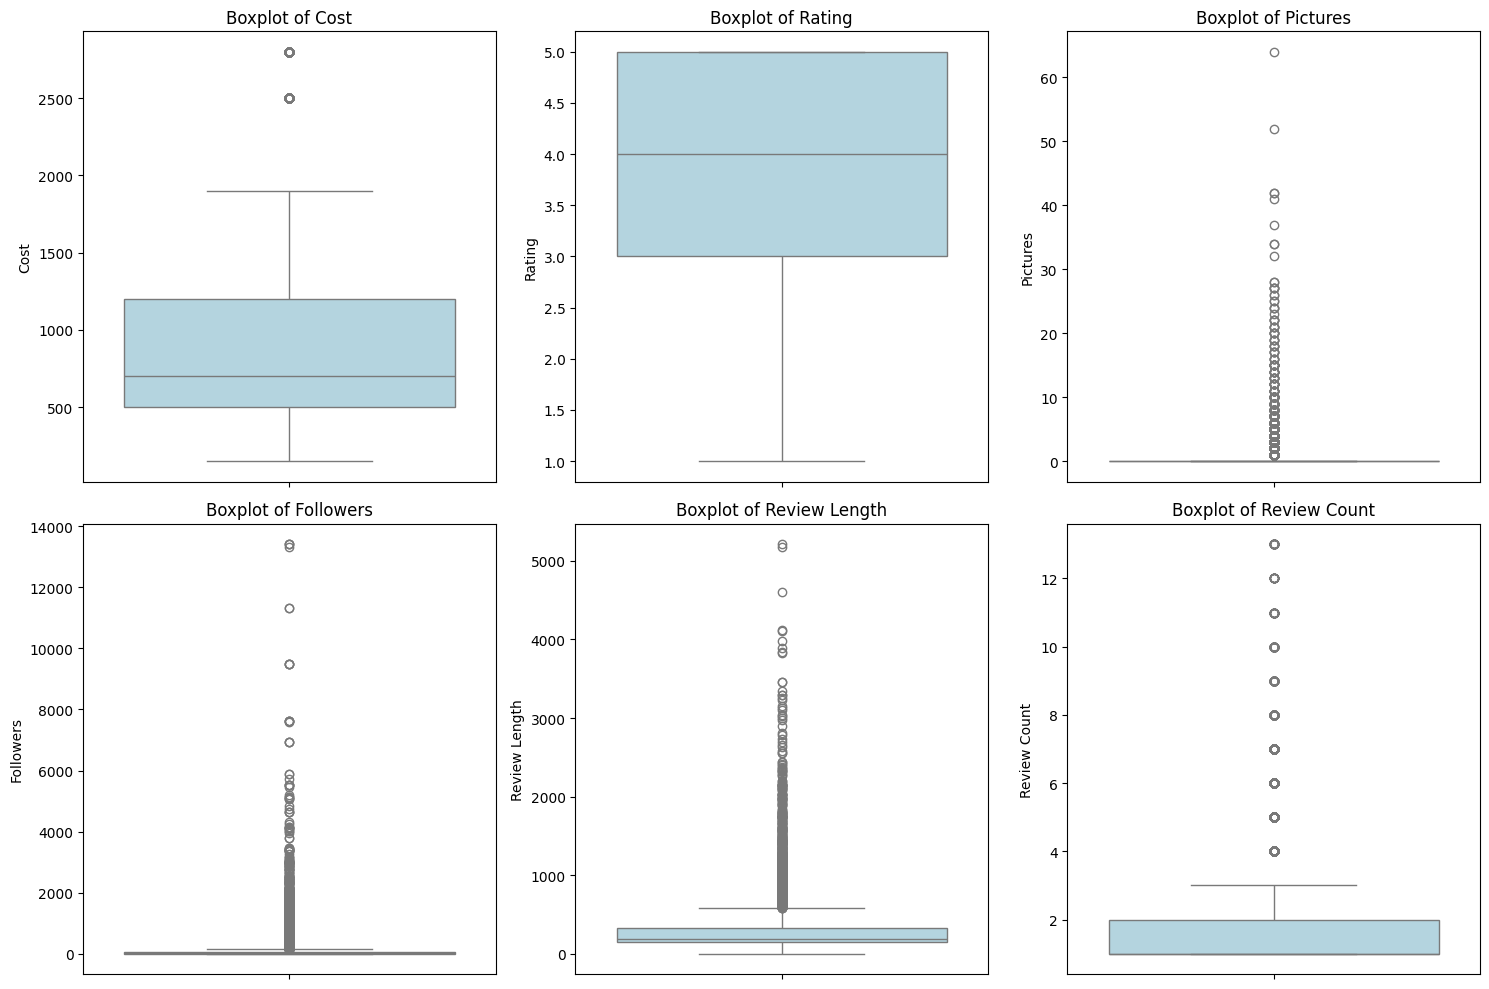

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers
numeric_cols = ['Cost', 'Rating', 'Pictures', 'Followers', 'Review Length', 'Review Count']

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=merged_df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [45]:
# now remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['Cost', 'Rating', 'Pictures', 'Followers', 'Review Length', 'Review Count']:
    before = merged_df.shape[0]
    merged_df = remove_outliers_iqr(merged_df, col)
    after = merged_df.shape[0]
    print(f"Removed {before - after} outliers from {col}")


Removed 200 outliers from Cost
Removed 0 outliers from Rating
Removed 1930 outliers from Pictures
Removed 1232 outliers from Followers
Removed 331 outliers from Review Length
Removed 558 outliers from Review Count


In [46]:
# categorical encoding
print(merged_df['Name'].unique())
print(merged_df['Reviewer'].nunique())
print(merged_df['Rating'].unique())



['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavacharu' 'Shanghai Chef 2' "Udipi's Upaha

In [47]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Restaurant Name 
label_encoder = LabelEncoder()
merged_df['Restaurant_Encoded'] = label_encoder.fit_transform(merged_df['Name'])

# 2. Frequency Encoding for Reviewer 
reviewer_freq = merged_df['Reviewer'].value_counts().to_dict()
merged_df['Reviewer_Encoded'] = merged_df['Reviewer'].map(reviewer_freq)

# Drop original text columns if desired 
merged_df.drop(['Name', 'Reviewer'], axis=1, inplace=True)

merged_df.head()


,Restaurant,Review,Rating,Metadata,Time,Pictures,Review Length,Followers,Cost,Review Count,Restaurant_Encoded,Reviewer_Encoded
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,222,2.0,800.0,1.0,16,1
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,144,2.0,800.0,1.0,16,1
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,189,3.0,800.0,1.0,16,1
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,148,0.0,800.0,1.0,16,1
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,160,2.0,800.0,3.0,16,3


In [56]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (no POS tagging or punkt)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text (no POS tagging)
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 4. Remove words with digits
    text = re.sub(r'\w*\d\w*', '', text)

    # 5. Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 6. Tokenize using simple split
    tokens = text.split()

    # 7. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 8. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Combine tokens back into cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the function to the 'Review' column
merged_df['Cleaned_Review'] = merged_df['Review'].astype(str).apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['Cleaned_Review'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())




In [58]:
# Remove columns with very low variance or duplicate information
from sklearn.feature_selection import VarianceThreshold

# Remove near-zero variance features
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_reduced = selector.fit_transform(tfidf_matrix)

print("Shape after removing low-variance features:", X_reduced.shape)


Shape after removing low-variance features: (5711, 2)


In [59]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['Cost', 'Rating', 'Review Length', 'Pictures', 'Followers', 'Review Count']
scaler = MinMaxScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])


In [61]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(tfidf_matrix)  
print("Reduced TF-IDF shape:", X_svd.shape)



Reduced TF-IDF shape: (5711, 100)


In [62]:
from sklearn.model_selection import train_test_split

# Example: using 'Rating' as the target
y = merged_df['Rating']
X = X_svd  # The reduced feature matrix

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4568, 100)
Test shape: (1143, 100)


In [64]:
print(y_train.unique())


[0.25  0.75  1.    0.    0.5   0.875 0.625 0.125 0.375]


In [66]:
def score_to_sentiment(score):
    if score >= 0.6:
        return 'positive'
    elif score <= 0.4:
        return 'negative'
    else:
        return 'neutral'
y_class = y.apply(score_to_sentiment)  # if y contains the float sentiment scores

# Now split again using these discrete sentiment classes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_svd, y_class, test_size=0.2, random_state=42, stratify=y_class)


In [67]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


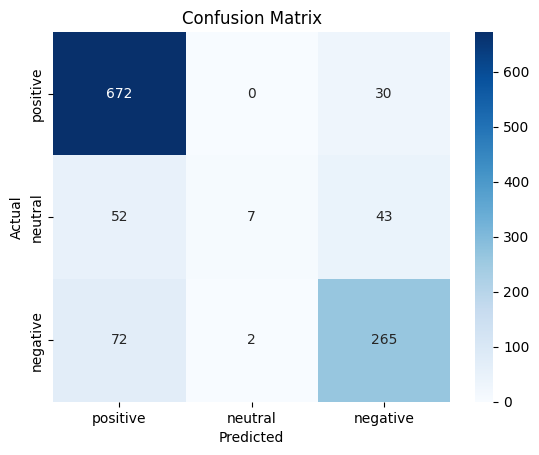

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       339
     neutral       0.78      0.07      0.13       102
    positive       0.84      0.96      0.90       702

    accuracy                           0.83      1143
   macro avg       0.80      0.60      0.60      1143
weighted avg       0.82      0.83      0.79      1143



In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


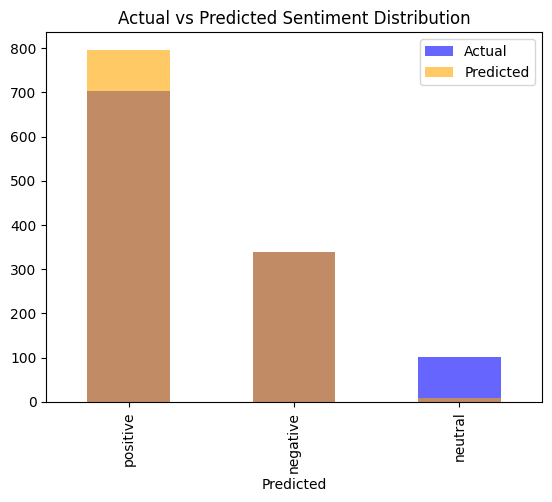

In [69]:
import pandas as pd

# Combine actual and predicted for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted sentiment counts
results_df['Actual'].value_counts().plot(kind='bar', alpha=0.6, label='Actual', color='blue')
results_df['Predicted'].value_counts().plot(kind='bar', alpha=0.6, label='Predicted', color='orange')
plt.title("Actual vs Predicted Sentiment Distribution")
plt.legend()
plt.show()


# clustering

In [70]:
from sklearn.preprocessing import StandardScaler

features for clustering
clustering_features = ['Cost', 'Rating', 'Review Count', 'Followers', 'Review Length', 'Pictures']
X_cluster = merged_df[clustering_features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


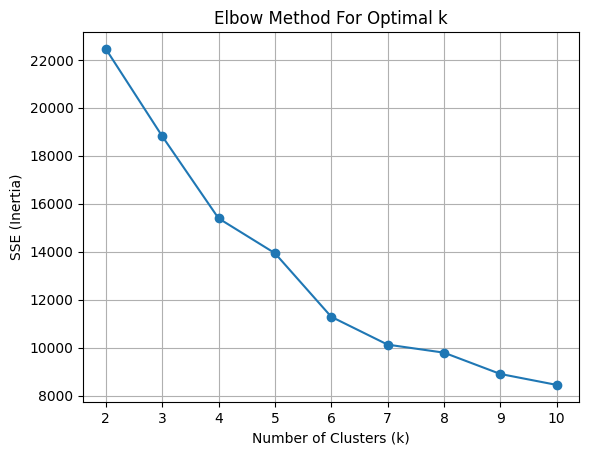

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [72]:
from sklearn.cluster import KMeans

# Fit KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)


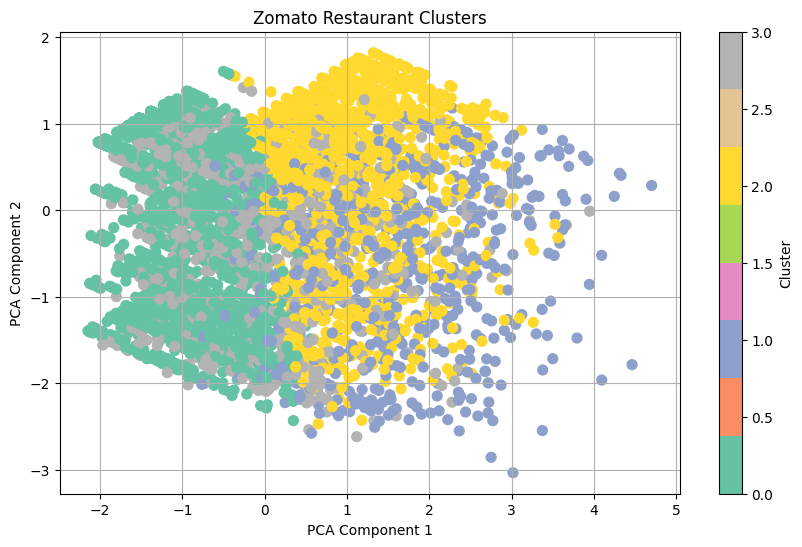

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=merged_df['Cluster'], cmap='Set2', s=50)
plt.title('Zomato Restaurant Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [74]:
cluster_summary = merged_df.groupby('Cluster')[clustering_features].mean()
print(cluster_summary)


             Cost    Rating  Review Count  Followers  Review Length  Pictures
Cluster                                                                      
0        0.215531  0.559211      0.000000   0.038257       0.182615       0.0
1        0.434070  0.620704      0.133162   0.641729       0.421350       0.0
2        0.611025  0.762226      0.045940   0.066316       0.464843       0.0
3        0.292460  0.631952      0.661070   0.079894       0.273763       0.0


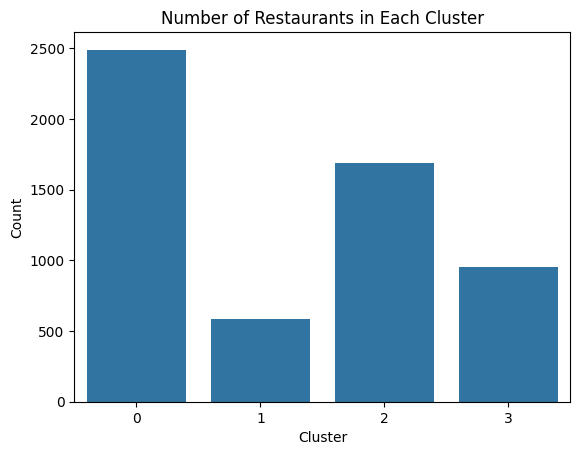

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of restaurants per cluster
sns.countplot(x=kmeans.labels_)
plt.title('Number of Restaurants in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [78]:
# Create a new DataFrame for clustering analysis
clustered_df = merged_df[['Cost', 'Rating', 'Review Count', 'Followers', 'Review Length', 'Pictures']].copy()



In [79]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_cluster)
agglo_score = silhouette_score(X_cluster, agglo_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)
dbscan_score = silhouette_score(X_cluster, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Add labels to the dataframe
clustered_df['KMeans'] = kmeans.labels_
clustered_df['Agglo'] = agglo_labels
clustered_df['DBSCAN'] = dbscan_labels


In [81]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for KMeans 
kmeans_score = silhouette_score(X_cluster, kmeans.labels_)



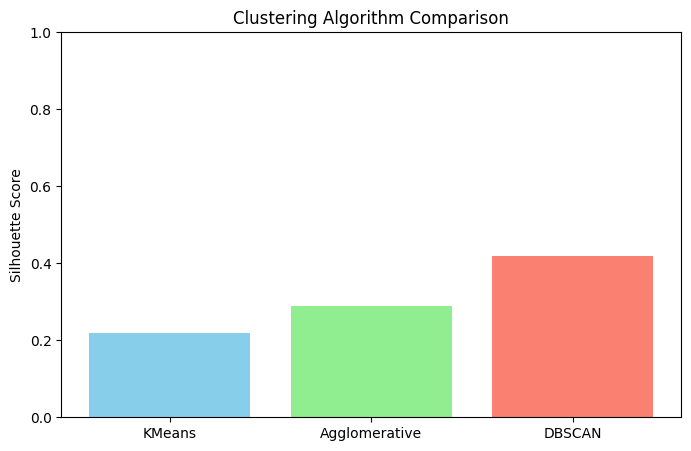

In [82]:
# Compare silhouette scores
scores = {
    'KMeans': kmeans_score,
    'Agglomerative': agglo_score,
    'DBSCAN': dbscan_score
}

# Bar chart for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Silhouette Score')
plt.title('Clustering Algorithm Comparison')
plt.ylim(0, 1)
plt.show()


In [84]:
import numpy as np
np.unique(dbscan_labels)


array([-1,  0])

In [85]:
# Create a copy of your normalized dataset
agglo_df = X_cluster.copy()
agglo_df['Cluster'] = agglo_labels  # Add agglomerative labels

# Compute cluster means
agglo_cluster_means = agglo_df.groupby('Cluster').mean()
agglo_cluster_means


,Cost,Rating,Review Count,Followers,Review Length,Pictures
Cluster,,,,,,
0,0.295648,0.130511,0.120741,0.109225,0.311994,0.0
1,0.635799,0.902298,0.000000,0.204516,0.390808,0.0
2,0.399831,0.868921,0.645314,0.158808,0.331642,0.0
3,0.247551,0.936017,0.000000,0.036938,0.224810,0.0


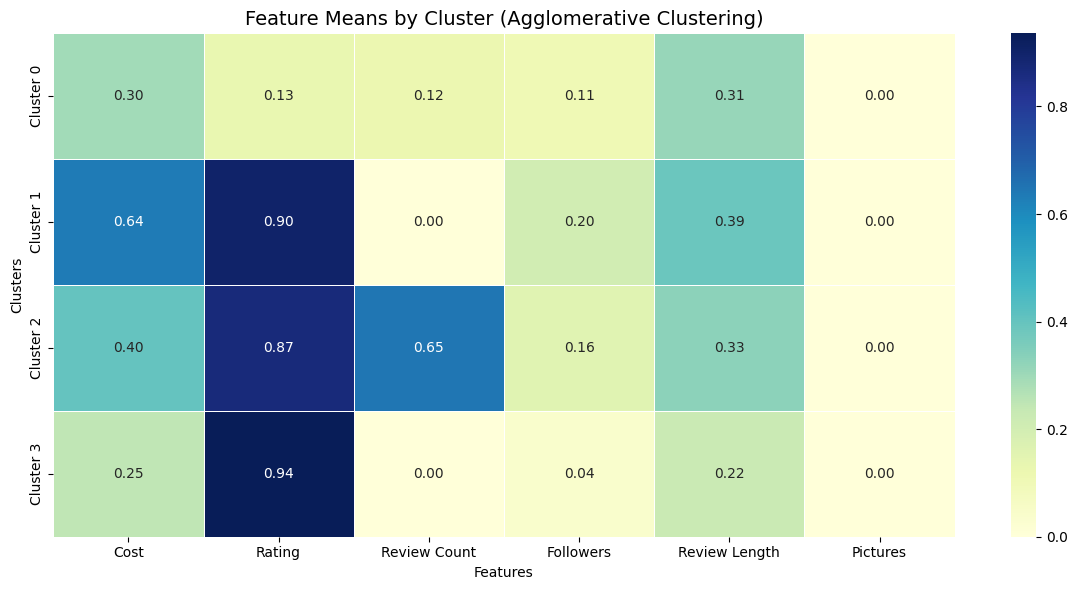

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster means (already calculated)
cluster_means = agglo_cluster_means.copy()
cluster_means.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Feature Means by Cluster (Agglomerative Clustering)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.tight_layout()
plt.show()


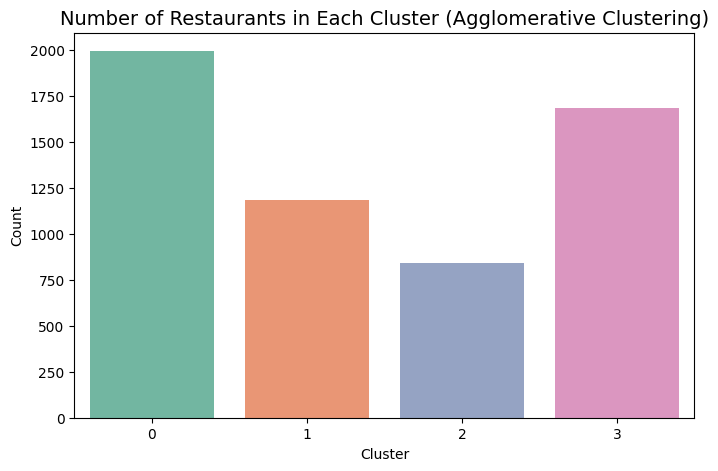

In [87]:
import pandas as pd

# Assuming you have cluster labels assigned:
# clustered_df['Agglo'] = agglo_labels

plt.figure(figsize=(8, 5))
sns.countplot(x='Agglo', data=clustered_df, palette='Set2')
plt.title("Number of Restaurants in Each Cluster (Agglomerative Clustering)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


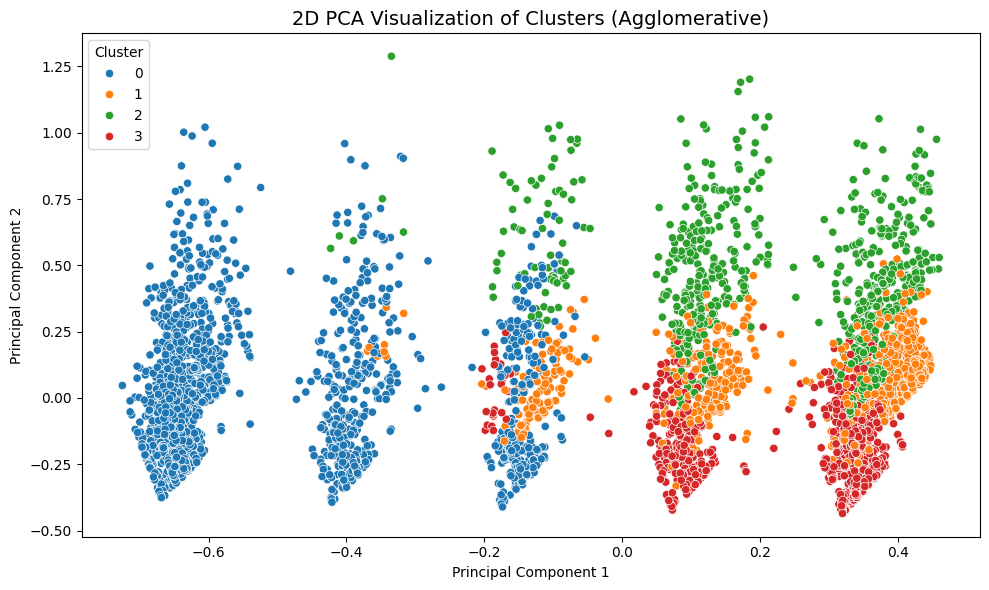

In [88]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Add PCA results to the dataframe
clustered_df['PCA1'] = X_pca[:, 0]
clustered_df['PCA2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='PCA1', y='PCA2', hue='Agglo', palette='tab10')
plt.title("2D PCA Visualization of Clusters (Agglomerative)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
